# Run scAge Notebook (12/9/2021) 

This notebook demonstrates how to execute the core function of the framework, `run_scAge`. This function takes as input processed binary methylation matrices (generated by `process_coverage`) and a reference dataset of bulk-derived models (generated by `construct_reference`), and outputs predicted epigenetic ages for single cells. <br><br> Processed single-cell methylation profiles from the [(Gravina et al, 2016)](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-016-1011-3) study are provided as an example in `sc_data_processed`, and a pre-processed C57BL/6J liver reference dataset from the [(Thompson et al, 2018)](https://www.aging-us.com/article/101590/text) study is provided in `train`.

## Load required packages

In [1]:
import numpy as np
import pandas as pd
import os
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
import scAge
import multiprocessing
num_total_cores = multiprocessing.cpu_count()

## Check single-cell and reference data

In [2]:
# check single-cell data
sc_directory = "../sc_data_processed/"
print("Single-cell input path: '%s'" % sc_directory)
sc_methylome_profiles = sorted(os.listdir(sc_directory))
if ".ipynb_checkpoints" in sc_methylome_profiles:
    os.rmdir(sc_directory + ".ipynb_checkpoints")
    sc_methylome_profiles.remove(".ipynb_checkpoints")
for count, profile in enumerate(sc_methylome_profiles):
    count = count + 1
    print("\tSingle-cell profile #%s: %s" % (count, profile))
      
# check bulk training data
train_directory = "../train/"
reference_file = "Thompson_Liver_BL6.tsv.gz"
full_reference_path = train_directory + reference_file
print("\nTraining reference data input path: %s" % full_reference_path)

# denote an output path
output_path = "../predictions/"
print("\nOutput path: '%s'" % output_path)

Single-cell input path: '../sc_data_processed/'
	Single-cell profile #1: SRR3136624.tsv.gz
	Single-cell profile #2: SRR3136625.tsv.gz
	Single-cell profile #3: SRR3136626.tsv.gz
	Single-cell profile #4: SRR3136627.tsv.gz
	Single-cell profile #5: SRR3136628.tsv.gz
	Single-cell profile #6: SRR3136629.tsv.gz
	Single-cell profile #7: SRR3136630.tsv.gz
	Single-cell profile #8: SRR3136631.tsv.gz
	Single-cell profile #9: SRR3136634.tsv.gz
	Single-cell profile #10: SRR3136635.tsv.gz
	Single-cell profile #11: SRR3136646.tsv.gz
	Single-cell profile #12: SRR3136647.tsv.gz
	Single-cell profile #13: SRR3136651.tsv.gz
	Single-cell profile #14: SRR3136652.tsv.gz
	Single-cell profile #15: SRR3136653.tsv.gz
	Single-cell profile #16: SRR3136654.tsv.gz
	Single-cell profile #17: SRR3136655.tsv.gz
	Single-cell profile #18: SRR3136656.tsv.gz
	Single-cell profile #19: SRR3136657.tsv.gz
	Single-cell profile #20: SRR3136658.tsv.gz
	Single-cell profile #21: SRR3136659.tsv.gz
	Single-cell profile #22: SRR3136660.

## Run scAge

In [3]:
scAge.run_scAge(single_cell_dir_or_dict = sc_directory,
                single_cell_set_name = "Gravina_Test",
                reference_data = full_reference_path,
                selection_mode = "percentile",
                CpG_parameter = 1,
                zero_met_replacement = 0.001,
                one_met_replacement = 0.999,
                min_age = -20,
                max_age = 60,
                age_step = 0.1,
                n_cores = num_total_cores,
                uncertainty = 1,
                output_path = output_path,
                chunksize = 1)

scAge algorithm starting!

----------------------------------------------------------
Profiling epigenetic age in 'Gravina_Test' single-cell data...
Loading processed binary methylation files from '../sc_data_processed/'...
Number of single cells to analyze: 26
----------------------------------------------------------

scAge parameters:
----------------------------------------------------------
Using reference training data: Thompson_Liver_BL6
Shape of reference matrix: 743,078 CpGs, 4 metric columns


Using 10 cores with chunksize of 1


Setting minimum age to -20 month(s)
Setting maximum age to 60 month(s)
Using age step of 0.1 month(s)


Replacing modeled bulk methylation ≤ 0 with 0.001
Replacing modeled bulk methylation ≥ 1 with 0.999


Using profiling mode: percentile
--> Profiling top 1% age-related CpGs by absolute Pearson correlation 

Using a prediction uncertainty metric of +/- 1 for confidence interval computation
----------------------------------------------------------



scAge progress :   0%|          | 0/26 [00:00<?, ? age predictions/s]




Predictions stored in '../predictions/'
----------------------------------------------------------

Time elapsed to generate scAge results = 53.804 seconds

scAge run complete!


## Load predictions

In [4]:
output_files = sorted(os.listdir(output_path))
counter = 1
print("Output files generated:")
for file in output_files:
    if ".tsv" in file:
        print(str(counter) + ") " + file)
        counter += 1

# load in predictions
test_predictions = pd.read_csv(output_path + \
                               "Gravina_Test-train(Thompson_Liver_BL6)-mode(percentile)-param(top_1_pct).tsv",
                               sep = "\t",
                               index_col = 0)

# load in metadata
meta_path = "../meta/Gravina_meta.tsv"
meta = pd.read_csv(meta_path,
                   sep = "\t", index_col = 0)

# getting final dataframe
test_predictions = test_predictions.join(meta)
print("\nDimensions of predictions matrix = {} cells by {} attributes".format(*test_predictions.shape))
test_predictions.head(3)

Output files generated:
1) Gravina_Test-train(Thompson_Liver_BL6)-mode(percentile)-param(top_1_pct).tsv

Dimensions of predictions matrix = 26 cells by 21 attributes


,PredictedAge,MeanMet,CellCoverage,Intersections,AgesTested,AgeLikelihood,SelectedCpGs,NumberCpGs,Correlations,RegressionCoefs,...,MethylationValues,LowerBound,UpperBound,Sample Name,Tissue,Age(str),Age(num),Type,Animal,Tissue-Age
Cell,,,,,,,,,,,,,,,,,,,,,
SRR3136624,3.2,0.614062,3646293,95690,"[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19...","[-819.1790175098449, -817.3547167391714, -815....","['chr1_4492602', 'chr1_4492624', 'chr1_9968104...",957,"[0.6768475153891691, 0.7122506967583089, 0.678...","[0.0025922214326084, 0.0023347171304051, 0.001...",...,"[0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, ...",2.0,4.5,f11,MEF,NaN,NaN,singleCell,f1,MEF
SRR3136625,0.9,0.638897,2277912,71874,"[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19...","[-427.65904602123146, -427.2253173898108, -426...","['chr1_10993855', 'chr1_10993876', 'chr1_25830...",719,"[0.6721603982132981, 0.6734012740470864, 0.636...","[0.0009925431871433, 0.0015295468162764, 0.002...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, ...",0.2,2.1,f23,MEF,NaN,NaN,singleCell,f2,MEF
SRR3136626,1.1,0.634295,3183103,99834,"[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19...","[-700.0813303262642, -697.9675295617728, -696....","['chr1_10993855', 'chr1_10993876', 'chr1_10993...",999,"[0.6721603982132981, 0.6734012740470864, 0.616...","[0.0009925431871433, 0.0015295468162764, 0.001...",...,"[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, ...",0.3,2.2,f22,MEF,NaN,NaN,singleCell,f2,MEF


## Plot predictions

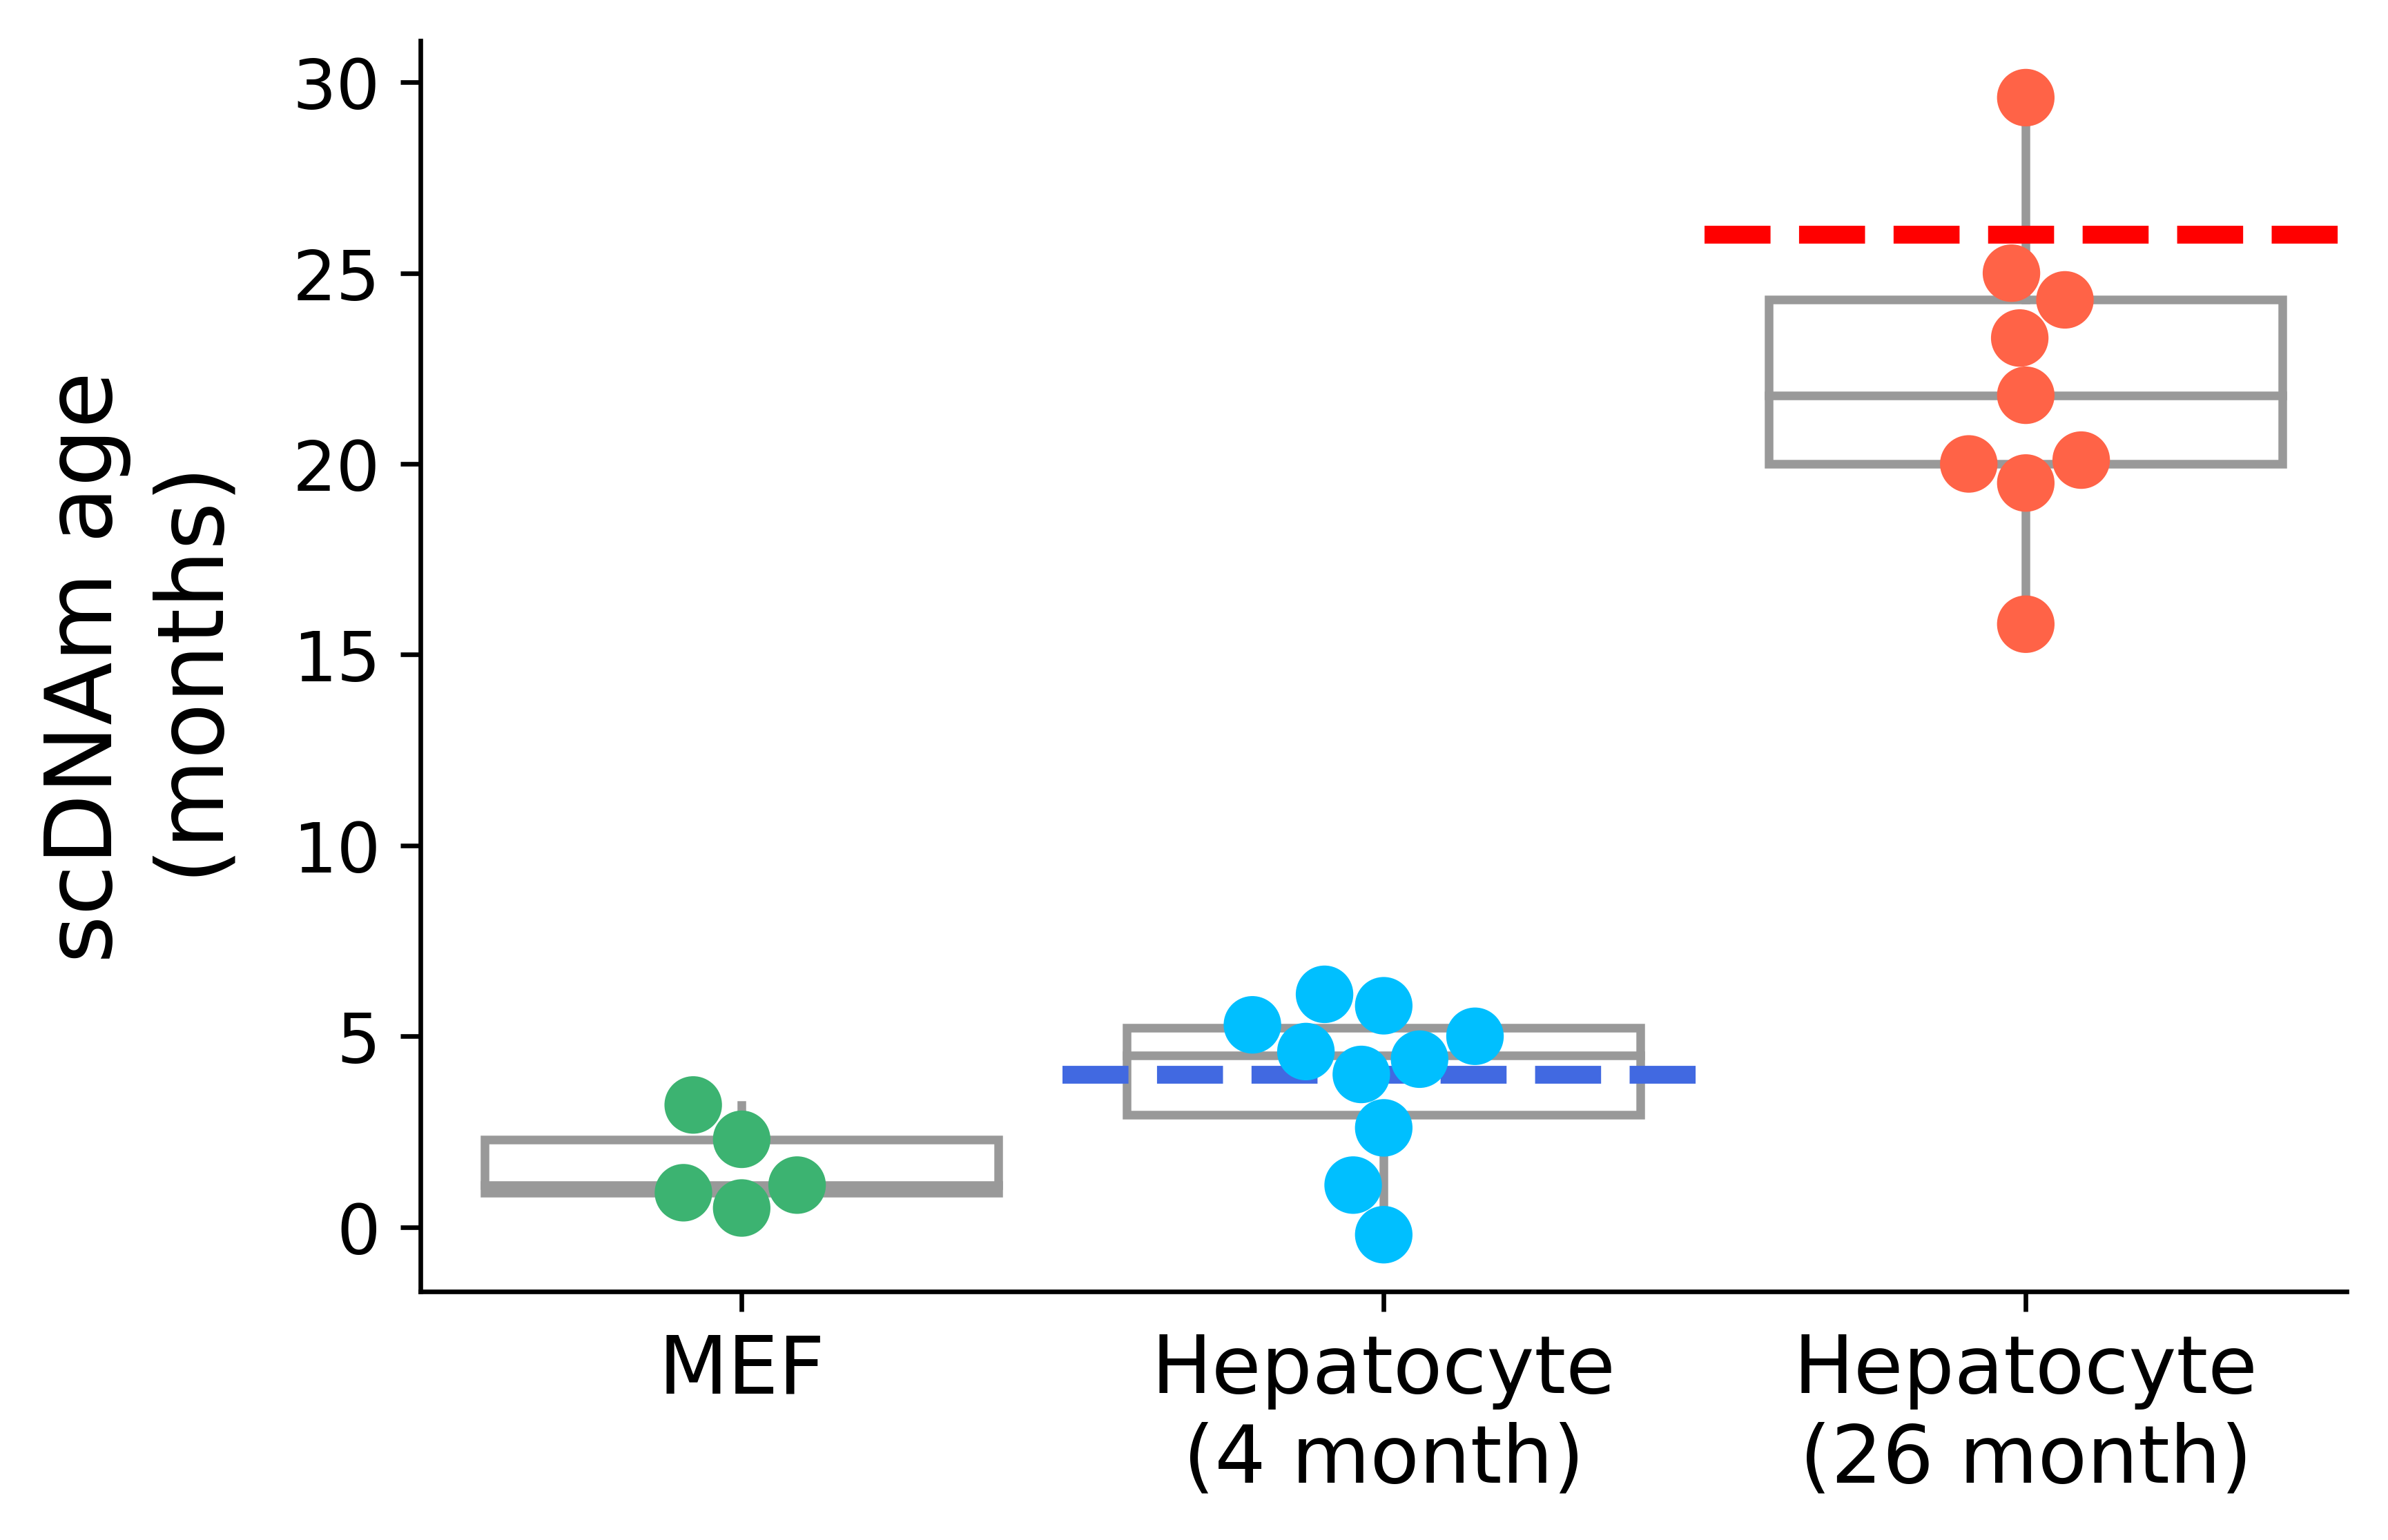

In [5]:
# plot predicted ages
fig, ax = plt.subplots(dpi = 600)

# remove 2 outlier cells (likely artifacts due to aberrant PCA clustering in the original study)
test_predictions_outrm = test_predictions.drop(["SRR3136664", "SRR3136629"])

order = ["MEF", "Hepatocyte\n(4 month)", "Hepatocyte\n(26 month)"]
palette = ["mediumseagreen", "deepskyblue", "tomato"]
x = "Tissue-Age"
y = "PredictedAge"

sns.boxplot(x = x,
            y = y,
            data = test_predictions_outrm,
            order = order,
            color = "white",
            showfliers = False,
            showcaps = False)
sns.swarmplot(x = x,
              y = y,
              data = test_predictions_outrm,
              order = order,
              palette = palette,
              s = 10)

plt.plot([0.5, 1.5], [4, 4], linestyle = "--", linewidth = 3.1, color = "royalblue")
plt.plot([1.5, 2.5], [26, 26], linestyle = "--", linewidth = 3.1, color = "red")
sns.despine()
plt.ylabel("scDNAm age\n(months)", fontsize = 16, labelpad = 10)
plt.xlabel("")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 12);